In [12]:
import netCDF4 as nc
import os
import numpy as np
import pandas as pd

## Название датасета: Sea level daily gridded data from satellite observations for the global ocean from 1993 to present
### *[Источник](https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-sea-level-global?tab=overview)*

## Смотрим на содержание файла netCDF: необходимая величина - sea_surface_height_above_geoid - 'adt'

In [13]:
ds_folder_name='./dataset2002_reanalysis'
my_example_nc_file = os.path.join(ds_folder_name, os.listdir(ds_folder_name)[0])
ds = nc.Dataset(my_example_nc_file)
#for var in ds.variables.values():
    #print(var)
print(ds['adt'])

<class 'netCDF4._netCDF4.Variable'>
int32 adt(time, latitude, longitude)
    _FillValue: -2147483647
    comment: The absolute dynamic topography is the sea surface height above geoid; the adt is obtained as follows: adt=sla+mdt where mdt is the mean dynamic topography; see the product user manual for details
    coordinates: longitude latitude
    grid_mapping: crs
    long_name: Absolute dynamic topography
    scale_factor: 0.0001
    standard_name: sea_surface_height_above_geoid
    units: m
unlimited dimensions: 
current shape = (1, 720, 1440)
filling on


## Функция для поиска индекса ближайшей ячейки по координатам (тест)

In [14]:
def geo_idx(dd, dd_array):
    geo_idx = (np.abs(dd_array - dd)).argmin()
    return geo_idx

in_lat = 77.627
in_lon = 19.877 

lats = ds.variables['latitude'][:]
lons = ds.variables['longitude'][:]

lat_idx = geo_idx(in_lat, lats)
lon_idx = geo_idx(in_lon, lons)

print(lat_idx)
print(lon_idx)

670
79


## Запускаем в цикле, формируем временной ряд

In [19]:
coordinates_from_map={'lat':[75.532663, 76.006222, 75.210923],
                      'lon':[17.902096, 24.893752, 11.252254]}

dates_list=[]
names_dict={}

for i in range (len(coordinates_from_map['lat'])):
    name=str(coordinates_from_map['lat'][i])+'_'+str(coordinates_from_map['lon'][i])
    names_dict[name]=[]
#print(names_dict)

for file in os.listdir(ds_folder_name):
    print(file)        
    try:
        ds = nc.Dataset(os.path.join(ds_folder_name, file))
    except Exception as e:
        print(e)
        pass
    date=file.split('_')[-2]
    dates_list.append(date)
        
    for i in range (len(coordinates_from_map['lat'])):        
        
        sea_level=np.array(ds['adt'][:, :, :])[0]

        in_lat = coordinates_from_map['lat'][i]
        in_lon = coordinates_from_map['lon'][i]

        lats = ds.variables['latitude'][:]
        lons = ds.variables['longitude'][:]

        lat_idx = geo_idx(in_lat, lats)
        lon_idx = geo_idx(in_lon, lons)

        value=sea_level[lat_idx, lon_idx]
        name=str(coordinates_from_map['lat'][i])+'_'+str(coordinates_from_map['lon'][i])
        names_dict[name].append(value)
names_dict['dates']=dates_list

dt_global_twosat_phy_l4_20020101_vDT2018.nc
dt_global_twosat_phy_l4_20020101_vDT2018.nc.aux.xml
[Errno -51] NetCDF: Unknown file format: b'./dataset2002_reanalysis\\dt_global_twosat_phy_l4_20020101_vDT2018.nc.aux.xml'
dt_global_twosat_phy_l4_20020102_vDT2018.nc
dt_global_twosat_phy_l4_20020103_vDT2018.nc
dt_global_twosat_phy_l4_20020104_vDT2018.nc
dt_global_twosat_phy_l4_20020105_vDT2018.nc
dt_global_twosat_phy_l4_20020106_vDT2018.nc
dt_global_twosat_phy_l4_20020107_vDT2018.nc
dt_global_twosat_phy_l4_20020108_vDT2018.nc
dt_global_twosat_phy_l4_20020109_vDT2018.nc
dt_global_twosat_phy_l4_20020110_vDT2018.nc
dt_global_twosat_phy_l4_20020111_vDT2018.nc
dt_global_twosat_phy_l4_20020112_vDT2018.nc
dt_global_twosat_phy_l4_20020113_vDT2018.nc
dt_global_twosat_phy_l4_20020114_vDT2018.nc
dt_global_twosat_phy_l4_20020115_vDT2018.nc
dt_global_twosat_phy_l4_20020116_vDT2018.nc
dt_global_twosat_phy_l4_20020117_vDT2018.nc
dt_global_twosat_phy_l4_20020118_vDT2018.nc
dt_global_twosat_phy_l4_20020119_v

dt_global_twosat_phy_l4_20020702_vDT2018.nc
dt_global_twosat_phy_l4_20020703_vDT2018.nc
dt_global_twosat_phy_l4_20020704_vDT2018.nc
dt_global_twosat_phy_l4_20020705_vDT2018.nc
dt_global_twosat_phy_l4_20020706_vDT2018.nc
dt_global_twosat_phy_l4_20020707_vDT2018.nc
dt_global_twosat_phy_l4_20020708_vDT2018.nc
dt_global_twosat_phy_l4_20020709_vDT2018.nc
dt_global_twosat_phy_l4_20020710_vDT2018.nc
dt_global_twosat_phy_l4_20020711_vDT2018.nc
dt_global_twosat_phy_l4_20020712_vDT2018.nc
dt_global_twosat_phy_l4_20020713_vDT2018.nc
dt_global_twosat_phy_l4_20020714_vDT2018.nc
dt_global_twosat_phy_l4_20020715_vDT2018.nc
dt_global_twosat_phy_l4_20020716_vDT2018.nc
dt_global_twosat_phy_l4_20020717_vDT2018.nc
dt_global_twosat_phy_l4_20020718_vDT2018.nc
dt_global_twosat_phy_l4_20020719_vDT2018.nc
dt_global_twosat_phy_l4_20020720_vDT2018.nc
dt_global_twosat_phy_l4_20020721_vDT2018.nc
dt_global_twosat_phy_l4_20020722_vDT2018.nc
dt_global_twosat_phy_l4_20020723_vDT2018.nc
dt_global_twosat_phy_l4_20020724

### Сортировка и запись набора данных в csv

In [20]:
pd_df = pd.DataFrame(names_dict, columns = list(names_dict.keys()))
pd_df['dates'] =  pd.to_datetime(pd_df['dates'], format='%Y%m%d')
pd_df=pd_df.sort_values(by=['dates'])
pd_df.to_csv('./formed_timelines/2002_spitz_reanalysis.csv', sep=';', index=False)
pd_df

,75.532663_17.902096,76.006222_24.893752,75.210923_11.252254,dates
0,-0.3240,-0.2591,-0.3683,2002-01-01
1,-0.3240,-0.2591,-0.3683,2002-01-01
2,-0.3240,-0.2552,-0.3706,2002-01-02
3,-0.3170,-0.2552,-0.3736,2002-01-03
4,-0.3071,-0.2532,-0.3745,2002-01-04
...,...,...,...,...
361,-0.2323,-0.1972,-0.3055,2002-12-27
362,-0.2309,-0.1965,-0.3066,2002-12-28
363,-0.2289,-0.1947,-0.3091,2002-12-29
364,-0.2309,-0.1925,-0.3068,2002-12-30


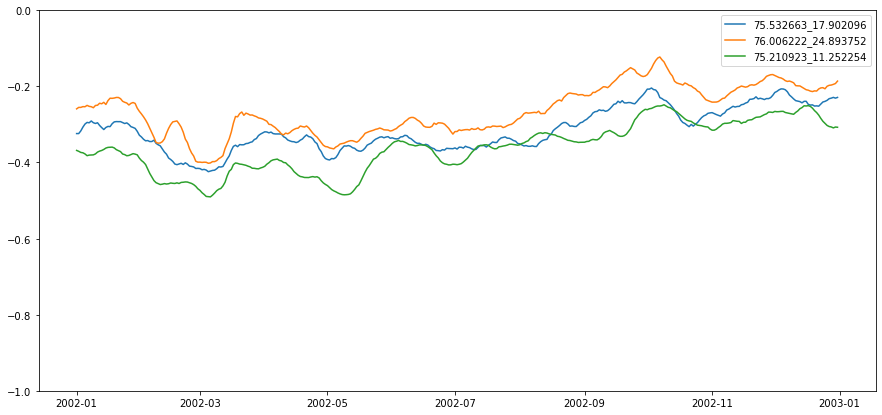

In [21]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7

for key in list(names_dict.keys()):
    if key!='dates':
        plt.plot(pd_df['dates'], pd_df[key], label=key)
plt.ylim(-1, 0)
plt.legend()
plt.show()